# Performance Analysis of LLAVA on Traffic Light Identification in the LISA Dataset

### Connecting drive to access files (model and dataset)


In [ ]:
from google.colab import drive
import os

# Unmount Google Drive
drive.flush_and_unmount()
print("Drive unmounted.")

# Mount Google Drive
drive.mount('/content/drive')

# Change directory to your Google Drive
os.chdir('/content/drive/My Drive')  # Adjust path as needed for your specific folder

# Print the current working directory
print("Current working directory:", os.getcwd())


Drive not mounted, so nothing to flush and unmount.
Drive unmounted.
Mounted at /content/drive
Current working directory: /content/drive/My Drive


# DATA  EXPLORATION LISA TRAFFIC DATASET

In [ ]:
# Import necessary libraries
import os
import random
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set inline plots for Jupyter Notebooks
%matplotlib inline


In [ ]:
# Define paths to annotations and frames
annotation_box_path = "/content/drive/My Drive/content/DL_Project/archive (2)/Annotations/Annotations/nightSequence1/frameAnnotationsBOX.csv"
frames_path = "/content/drive/My Drive/content/DL_Project/archive (2)/nightSequence1/nightSequence1/frames/"

# Load annotations into a DataFrame
annotation_data = pd.read_csv(annotation_box_path, delimiter=';')
print("First few rows of the annotation data:")
print(annotation_data.head())

# Check distribution of annotation tags
print("\nDistribution of annotation tags:")
print(annotation_data['Annotation tag'].value_counts())


First few rows of the annotation data:
                              Filename Annotation tag  Upper left corner X  \
0  nightTest/nightSequence1--00000.jpg             go                  667   
1  nightTest/nightSequence1--00000.jpg           stop                  520   
2  nightTest/nightSequence1--00000.jpg           stop                  725   
3  nightTest/nightSequence1--00001.jpg             go                  667   
4  nightTest/nightSequence1--00001.jpg           stop                  520   

   Upper left corner Y  Lower right corner X  Lower right corner Y  \
0                  385                   676                   400   
1                  387                   532                   408   
2                  385                   740                   412   
3                  385                   676                   400   
4                  386                   532                   407   

                                  Origin file  Origin frame number  \
0

Display a sample image with Annotation

Selected Image: nightSequence1--02219.jpg
Path: /content/drive/My Drive/content/DL_Project/archive (2)/nightSequence1/nightSequence1/frames/nightSequence1--02219.jpg


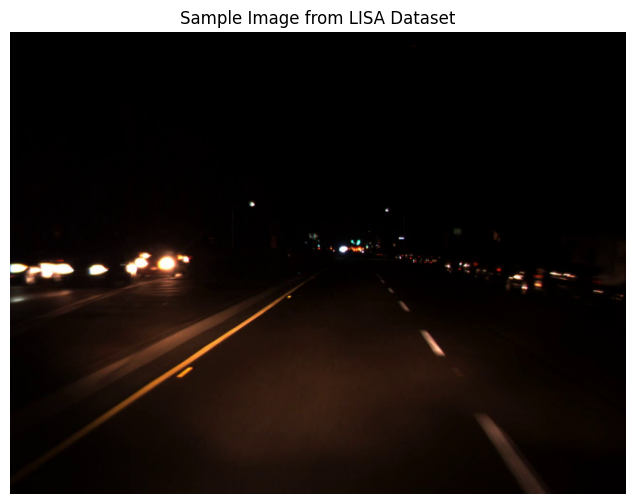

In [ ]:
# Choose a random image from the frames folder
frame_id = random.choice(os.listdir(frames_path))
frame_path = os.path.join(frames_path, frame_id)
print(f"Selected Image: {frame_id}\nPath: {frame_path}")

# Load the image
image = cv2.imread(frame_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(12, 6))
plt.imshow(image)
plt.axis("off")
plt.title("Sample Image from LISA Dataset")
plt.show()


Overlay Bounding Boxes on the Image

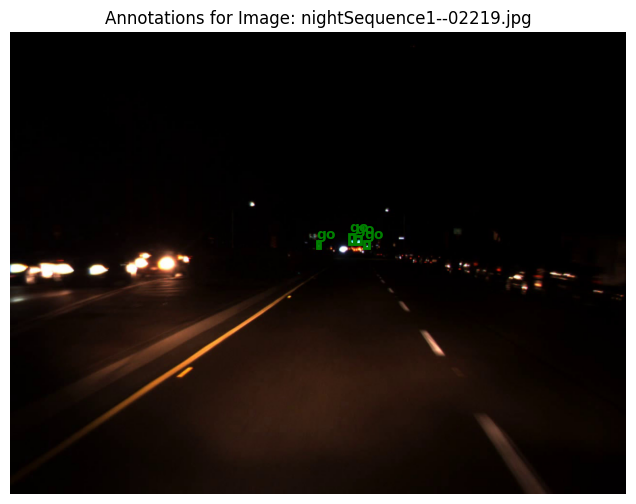

In [ ]:
# Filter annotations for the selected image
filtered_annotations = annotation_data[annotation_data['Filename'].str.contains(frame_id)]

# Display the image with bounding boxes
plt.figure(figsize=(12, 6))
plt.imshow(image)
current_axis = plt.gca()

# Add bounding boxes
for _, row in filtered_annotations.iterrows():
    x1, y1 = int(row['Upper left corner X']), int(row['Upper left corner Y'])
    x2, y2 = int(row['Lower right corner X']), int(row['Lower right corner Y'])
    label = row['Annotation tag']

    # Define colors for traffic light states
    if "go" in label:
        color = "green"
    elif "stop" in label:
        color = "red"
    elif "warning" in label:
        color = "yellow"
    else:
        color = "blue"

    # Draw bounding box and label
    current_axis.add_patch(
        patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor=color, facecolor="none")
    )
    plt.text(x1, y1 - 5, label, color=color, fontsize=10, fontweight="bold")

plt.title(f"Annotations for Image: {frame_id}")
plt.axis("off")
plt.show()


Statistical Summary of Bounding Box Dimensions

In [ ]:
# Statistical summary of bounding box dimensions
print("Summary statistics for bounding box coordinates:")
print(annotation_data.describe()[['Upper left corner X', 'Upper left corner Y',
                                  'Lower right corner X', 'Lower right corner Y']])


Summary statistics for bounding box coordinates:
       Upper left corner X  Upper left corner Y  Lower right corner X  \
count         18514.000000         18514.000000          18514.000000   
mean            662.098088           340.374311            682.635087   
std             173.908629            87.441111            174.345479   
min               0.000000             0.000000             13.000000   
25%             624.000000           317.000000            648.000000   
50%             685.500000           368.000000            699.000000   
75%             750.000000           394.000000            765.000000   
max            1265.000000           483.000000           1280.000000   

       Lower right corner Y  
count          18514.000000  
mean             379.533542  
std               72.616628  
min               27.000000  
25%              372.000000  
50%              403.000000  
75%              419.000000  
max              516.000000  


Image Size Consistency Check

In [ ]:
# Function to get image size
def get_image_size(image_path):
    img = cv2.imread(image_path)
    return img.shape[:2]

# Check sizes for all images in the folder
image_sizes = [get_image_size(os.path.join(frames_path, img)) for img in os.listdir(frames_path) if img.endswith(('.jpg', '.png'))]
unique_sizes = set(image_sizes)

print(f"Number of unique image sizes: {len(unique_sizes)}")
if len(unique_sizes) == 1:
    print(f"All images have the same size: {unique_sizes.pop()}")
else:
    print(f"Different image sizes found: {unique_sizes}")


Number of unique image sizes: 1
All images have the same size: (960, 1280)


Distribution of Annotation Tags

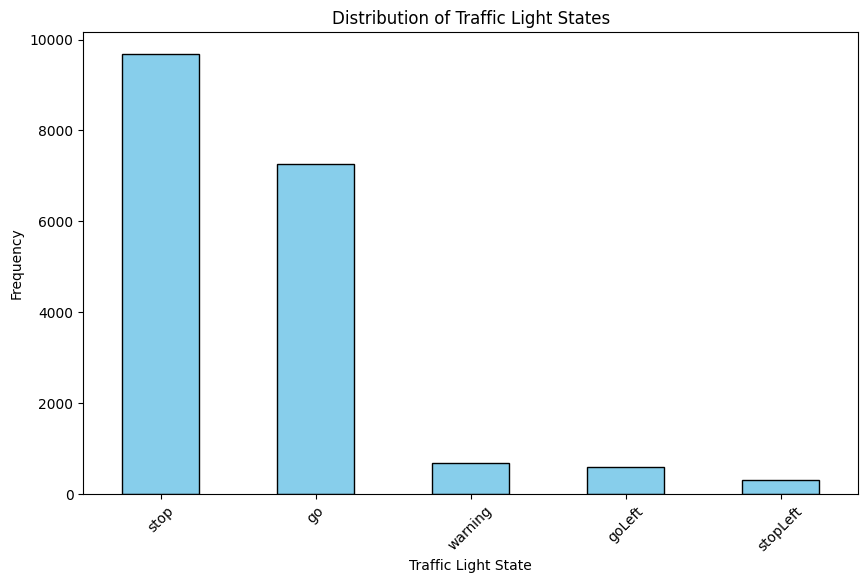

In [ ]:
# Distribution of traffic light states
tag_counts = annotation_data['Annotation tag'].value_counts()
plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Traffic Light States")
plt.xlabel("Traffic Light State")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


Visualizing Traffic Light Positions

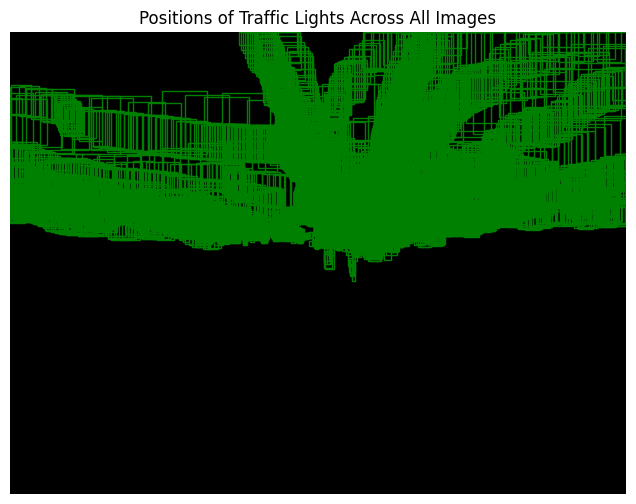

In [ ]:
# Overlay all bounding boxes on a blank image to visualize traffic light positions
blank_image = np.zeros_like(image)

plt.figure(figsize=(12, 6))
current_axis = plt.gca()

for _, row in annotation_data.iterrows():
    x1, y1 = int(row['Upper left corner X']), int(row['Upper left corner Y'])
    x2, y2 = int(row['Lower right corner X']), int(row['Lower right corner Y'])

    # Draw bounding boxes on blank image
    current_axis.add_patch(
        patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor="green", facecolor="none")
    )

plt.imshow(blank_image)
plt.title("Positions of Traffic Lights Across All Images")
plt.axis("off")
plt.show()


### Overlaying bounding boxes of all traffic lights across the dataset onto a single image reveals that traffic lights are predominantly situated in the upper portion of the images, specifically in the top half in 98.5% of cases. This observation justifies the decision to simplify the spatial categorization of LLAVA responses and ground truth into a left, right, and center split, rather than adopting a more granular 9-way division that includes bottom and middle positions (e.g., bottom right, bottom center, mid-center, etc.).

9way division vs 3way division

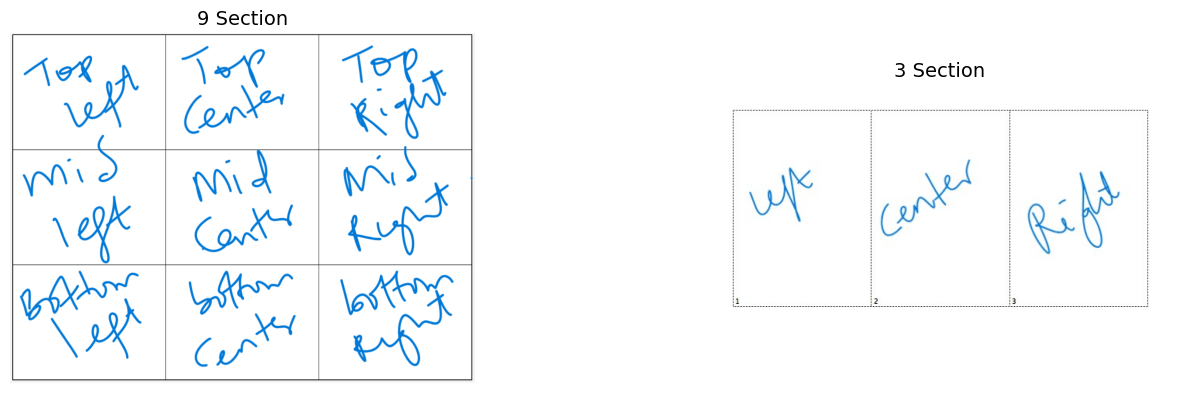

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the two images
image1 = Image.open("/content/drive/My Drive/content/DL_Project/9section_image_division.png")  # Replace with the path to your first image
image2 = Image.open("/content/drive/My Drive/content/DL_Project/3section_image_labeled.jpg")  # Replace with the path to your second image

# Display the images side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 7))  # Adjust figsize for clarity

# Show the first image
axes[0].imshow(image1)
axes[0].axis('off')  # Turn off the axis
axes[0].set_title('9 Section', fontsize=14)

# Show the second image
axes[1].imshow(image2)
axes[1].axis('off')  # Turn off the axis
axes[1].set_title('3 Section', fontsize=14)

# Adjust layout to add space between the images
plt.subplots_adjust(wspace=0.5)  # Increase the space between the two images

# Display the images
plt.show()


In [ ]:
# Import dependencies
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import cv2
import random
import os
import numpy as np
import pandas as pd
#import matplotlib.patches as patches

In [ ]:
# pip install huggingface-hub


In [ ]:
# !huggingface-cli login


In [ ]:
# !huggingface-cli repo-download llava-hf/llava-1.5-7b-hf --cache-dir "/content/drive/My Drive/content/DL_Project/"


In [ ]:
pip install huggingface-hub


In [ ]:
from huggingface_hub import snapshot_download

# Define your target folder
target_folder = "/content/drive/My Drive/content/DL_Project/"

# Download the LLaVA model checkpoint
#model_path = snapshot_download(repo_id="llava-hf/llava-1.5-7b-hf", cache_dir=target_folder)

print(f"Model downloaded to: {model_path}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.20k [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

Model downloaded to: /content/drive/My Drive/content/DL_Project/models--llava-hf--llava-1.5-7b-hf/snapshots/8c85e9a4d626b7b908448be32c1ba5ad79b95e76


In [ ]:
from transformers import pipeline

model_id = "/content/drive/My Drive/content/DL_Project/models--llava-hf--llava-1.5-7b-hf/snapshots/8c85e9a4d626b7b908448be32c1ba5ad79b95e76"
pipe = pipeline("image-to-text", model=model_id)



Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
#share pipe with vic
import pickle

# # Define the path in Google Drive
file_path = "/content/drive/My Drive/content/DL_Project/pipe_share.pkl"

# # Save the variable to Google Drive
with open(file_path, "wb") as file:
    pickle.dump(pipe, file)

print("pipe variable successfuly saved stored successfully in Google Drive!")

In [1]:
# from PIL import Image
# image_path = "/content/drive/My Drive/content/DL_Project/archive (2)/nightSequence1/nightSequence1/frames/nightSequence1--00004.jpg"  # Replace with your image path
# image = Image.open(image_path)
# prompt = "USER: <image>\\nDescribe the state and location of all traffic lights in the image. Provide the location as 'upper left', 'center', 'lower right', etc.\nASSISTANT:"
#         #"USER: <image>\\nWare they traffic lights in the image?\nASSISTANT:"
# outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
# #print(outputs["generated_text"])
# print(outputs[0]["generated_text"])

# Cropped LISA Traffic Light Dataset


In his case similar type are stored in the same folder

In [ ]:
from PIL import Image
image_path = "/content/drive/My Drive/content/DL_Project/cropped_lisa_traffic_light/cropped_lisa_1/val_1/goForward/ds2_pic64.jpg"  # Replace with your image path
image = Image.open(image_path)
prompt = "USER: <image>\\nin one word what color traffic light is on in the image.\nASSISTANT:"
        #"USER: <image>\\nWare they traffic lights in the image?\nASSISTANT:"
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
#print(outputs["generated_text"])
print(outputs[0]["generated_text"])

Expanding inputs for image tokens in LLaVa should be done in processing. Please add `patch_size` and `vision_feature_select_strategy` to the model's processing config or set directly with `processor.patch_size = {{patch_size}}` and processor.vision_feature_select_strategy = {{vision_feature_select_strategy}}`. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.


USER:  \nin one word what color traffic light is on in the image.
ASSISTANT: Green


In [ ]:
from transformers import pipeline
from PIL import Image
import os
import random

def get_ground_truth(image_name, image_folder):
    # Extract ground truth based on the folder name
    folder_name = os.path.basename(image_folder)

    if 'go' in folder_name:
        return 'green'
    elif 'warning' in folder_name:
        return 'yellow'
    elif 'stop' in folder_name:
        return 'red'
    else:
        return 'unknown'

def batch_process_llava(image_folder, prompt, model_path):
    # Initialize the LLAVA pipeline
    pipe = pipeline("image-to-text", model=model_path)

    # Dictionaries to store ground truth and LLAVA outputs
    ground_truth = {}
    lava_outputs = {}

    # Get all the image folders in the directory
    folders = [folder for folder in os.listdir(image_folder) if os.path.isdir(os.path.join(image_folder, folder))]

    # Process each folder
    for folder in folders:
        folder_path = os.path.join(image_folder, folder)

        # Get all images in the folder
        images_in_folder = [img for img in os.listdir(folder_path) if img.endswith(('.jpg', '.png', '.jpeg'))]

        # Randomly select 10 images from the folder
        selected_images = random.sample(images_in_folder, min(5, len(images_in_folder)))

        # Process the selected images
        for image_name in selected_images:
            image_path = os.path.join(folder_path, image_name)
            image = Image.open(image_path)
            print(image_path)

            # Extract ground truth from folder name
            gt = get_ground_truth(image_name, folder_path)
            ground_truth[image_name] = gt  # Store ground truth

            # Generate output from LLAVA
            outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
            lava_outputs[image_name] = outputs[0]["generated_text"]  # Save output by image name

    return ground_truth, lava_outputs

# Example usage
if __name__ == "__main__":
    image_folder = "/content/drive/My Drive/content/DL_Project/cropped_lisa_traffic_light/cropped_lisa_1/val_1"  # Path to folder containing images
    model_path = "/content/drive/My Drive/content/DL_Project/models--llava-hf--llava-1.5-7b-hf/snapshots/8c85e9a4d626b7b908448be32c1ba5ad79b95e76"  # Path to the LLAVA model
    prompt = "USER: <image>\\nin one word what color traffic light is on in the image.\nASSISTANT:"  # Simplified prompt

    ground_truth, lava_results = batch_process_llava(image_folder, prompt, model_path)

    # Print or save the results
    print("Ground Truth:")
    print(ground_truth)
    print("\nLlava Outputs:")
    print(lava_results)


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

/content/drive/My Drive/content/DL_Project/cropped_lisa_traffic_light/cropped_lisa_1/val_1/goForward/ds2_pic528.jpg


Expanding inputs for image tokens in LLaVa should be done in processing. Please add `patch_size` and `vision_feature_select_strategy` to the model's processing config or set directly with `processor.patch_size = {{patch_size}}` and processor.vision_feature_select_strategy = {{vision_feature_select_strategy}}`. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.


/content/drive/My Drive/content/DL_Project/cropped_lisa_traffic_light/cropped_lisa_1/val_1/goForward/ds2_pic68.jpg
/content/drive/My Drive/content/DL_Project/cropped_lisa_traffic_light/cropped_lisa_1/val_1/goForward/ds2_pic186.jpg
/content/drive/My Drive/content/DL_Project/cropped_lisa_traffic_light/cropped_lisa_1/val_1/goForward/ds2_pic737.jpg
/content/drive/My Drive/content/DL_Project/cropped_lisa_traffic_light/cropped_lisa_1/val_1/goForward/ds2_pic627.jpg
/content/drive/My Drive/content/DL_Project/cropped_lisa_traffic_light/cropped_lisa_1/val_1/go/ds2_pic4969.jpg
/content/drive/My Drive/content/DL_Project/cropped_lisa_traffic_light/cropped_lisa_1/val_1/go/ns1_pic16683.jpg
/content/drive/My Drive/content/DL_Project/cropped_lisa_traffic_light/cropped_lisa_1/val_1/go/ds2_pic2715.jpg
/content/drive/My Drive/content/DL_Project/cropped_lisa_traffic_light/cropped_lisa_1/val_1/go/ds2_pic2645.jpg
/content/drive/My Drive/content/DL_Project/cropped_lisa_traffic_light/cropped_lisa_1/val_1/go/ds

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
def clean_output(output):
    if "ASSISTANT:" in output:
        return output.split(":")[-1].strip().lower()
    return output.lower()

cleaned_outputs = {k: clean_output(v) for k, v in lava_results.items()}

# Match ground truth and predictions
y_true = [ground_truth[key] for key in ground_truth]
print(y_true)
y_pred = [cleaned_outputs[key] for key in ground_truth]
print(y_pred)

# Evaluate
print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'blue', 'green', 'green', 'green', 'blue', 'green', 'green', 'the traffic light in the image is red.', 'red', 'red', 'red', 'the traffic light in the image is red.', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'yellow', 'yellow', 'yellow', 'red', 'yellow']
Accuracy: 0.7714285714285715

Classification Report:
                                        precision    recall  f1-score   support

                                  blue       0.00      0.00      0.00         0
                                 green       1.00      0.87      0.93        15
                                   red       0.71      1.00      0.83        10
the traffic light in the image is red.       0.00      0.00      0.00         0
                                yellow       1.00      0.40      0.57        10

                              accuracy                           0.77        35
                             

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#from Levenshtein import distance as levenshtein_distance

# Define similarity metrics
def jaccard_similarity(set_a, set_b):
    """Compute Jaccard Similarity."""
    return len(set_a & set_b) / len(set_a | set_b)

def cosine_sim(a, b):
    """Compute Cosine Similarity."""
    vectorizer = CountVectorizer().fit([a, b])
    vecs = vectorizer.transform([a, b])
    return cosine_similarity(vecs)[0, 1]

def levenshtein_sim(a, b):
    """Compute Levenshtein Similarity."""
    dist = levenshtein_distance(a, b)
    return 1 - dist / max(len(a), len(b))

# Preprocess Llava outputs to extract color responses
def preprocess_llava_outputs(llava_outputs):
    return {key: value.split("ASSISTANT:")[-1].strip().lower() for key, value in llava_outputs.items()}

# Evaluate similarities
def compute_similarities(ground_truth, llava_outputs):
    llava_processed = preprocess_llava_outputs(llava_outputs)

    # Intersection and Union for Jaccard
    ground_truth_values = set(ground_truth.values())
    llava_values = set(llava_processed.values())

    # Jaccard Similarity
    jaccard_sim = jaccard_similarity(ground_truth_values, llava_values)

    # Concatenate all values for Cosine and Levenshtein
    ground_truth_concat = " ".join(ground_truth.values())
    llava_concat = " ".join(llava_processed.values())

    # Cosine and Levenshtein Similarities
    cosine_sim_val = cosine_sim(ground_truth_concat, llava_concat)
    #levenshtein_sim_val = levenshtein_sim(ground_truth_concat, llava_concat)

    return {
        "Jaccard Similarity": jaccard_sim,
        "Cosine Similarity": cosine_sim_val,
        #"Levenshtein Similarity": levenshtein_sim_val
    }


# Compute and print metrics
print(ground_truth)
print(lava_results)
metrics = compute_similarities(ground_truth, lava_results)
print(metrics)


{'ds2_pic528.jpg': 'green', 'ds2_pic68.jpg': 'green', 'ds2_pic186.jpg': 'green', 'ds2_pic737.jpg': 'green', 'ds2_pic627.jpg': 'green', 'ds2_pic4969.jpg': 'green', 'ns1_pic16683.jpg': 'green', 'ds2_pic2715.jpg': 'green', 'ds2_pic2645.jpg': 'green', 'ds2_pic2936.jpg': 'green', 'ds2_pic527.jpg': 'green', 'ds2_pic350.jpg': 'green', 'ds2_pic810.jpg': 'green', 'ns1_pic16804.jpg': 'green', 'ds2_pic216.jpg': 'green', 'ds1_pic5671.jpg': 'yellow', 'ds1_pic6174.jpg': 'yellow', 'ds1_pic7609.jpg': 'yellow', 'ds1_pic6159.jpg': 'yellow', 'ds1_pic7684.jpg': 'yellow', 'ns1_pic10833.jpg': 'red', 'ds1_pic608.jpg': 'red', 'ns1_pic17804.jpg': 'red', 'ds2_pic7794.jpg': 'red', 'ns1_pic17390.jpg': 'red', 'ns1_pic8040.jpg': 'red', 'ds1_pic5466.jpg': 'red', 'ns1_pic10559.jpg': 'red', 'ns1_pic11496.jpg': 'red', 'ds2_pic9335.jpg': 'red', 'ns1_pic18349.jpg': 'yellow', 'ds2_pic8853.jpg': 'yellow', 'ns1_pic18326.jpg': 'yellow', 'ds1_pic5406.jpg': 'yellow', 'ns1_pic17697.jpg': 'yellow'}
{'ds2_pic528.jpg': 'USER:  \\n

# LISA Traffic Light Dataset

In [ ]:
from PIL import Image
image_path = "/content/drive/My Drive/content/DL_Project/archive (2)/nightSequence1/nightSequence1/frames/nightSequence1--00004.jpg"  # Replace with your image path
image = Image.open(image_path)
prompt = """USER: <image>\\nDescribe the state and location of all traffic lights in the image. Provide the location as 'upper left', 'center', 'lower right', etc.\nASSISTANT:"""
#"""USER:<image>\\nExamine the image and describe the traffic lights. output your response in the format 'color: location. If there is one traffic light, specify its color as 'go' (green), 'stop' (red), or 'warning' (yellow) and its location (e.g., 'upper left,' 'mid center'). If there are multiple traffic lights, using the same format list each visible light’s color and location individually. Only state the traffic lights that are clearly visible in the image, and avoid making assumptions or including unrelated details\nASSISTANT:"""
        #"""USER: <image>\\nAnalyze the image and describe the traffic lights. If there is one traffic light, state its color as 'go' for green, 'stop' for red, 'warning' for yellow and its location (e.g., 'upper left', upper right, depending on its position on the image). If multiple lights are present, list each light’s color and location individually. Only describe lights visible in the image, and avoid adding lights or locations not shown\nASSISTANT:"""
        #"""USER: <image>\\nDescribe the traffic lights in the image. If there is only one light, provide its state ('go' for green, 'stop' for red, 'warning' for yellow) and its approximate location (e.g., 'upper left,' 'mid right'). If there are multiple lights, list each light's state and location individually. Be concise and avoid repetition.\nASSISTANT:"""
        #"""USER: <image>\\nDescribe the traffic lights in the image. For each light, specify its state as "go" (green light), "stop" (red light), or "warning" (yellow light), and its location in the format 'state: location (e.g., upper left, upper right, upper center, mid left, mid right, mid center, lower left, lower right, lower center)'.\nASSISTANT:"""
        #"""USER: <image>\\nMention all traffic lights in the image. For each light, specify its state as "go" (green light), stop for (red light), or "warning" (yellow light), and its location on the image in the format 'location: state (location will be one of the following: 'upper left', 'upper right', 'upper center', 'mid left, 'mid right','mid center', 'lower left', 'lower right', 'lower center', depending on the lights relative location in the image)\nASSISTANT:"""
        #"""USER: <image>\\nDescribe the state and location of all traffic lights in the image. Provide the location as 'upper left', 'center', 'lower right', etc.\nASSISTANT:"""
        #"USER: <image>\\nWare they traffic lights in the image?\nASSISTANT:"
outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
#print(outputs["generated_text"])
print(outputs[0]["generated_text"])

Expanding inputs for image tokens in LLaVa should be done in processing. Please add `patch_size` and `vision_feature_select_strategy` to the model's processing config or set directly with `processor.patch_size = {{patch_size}}` and processor.vision_feature_select_strategy = {{vision_feature_select_strategy}}`. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.


USER:  \nDescribe the state and location of all traffic lights in the image. Provide the location as 'upper left', 'center', 'lower right', etc.
ASSISTANT: In the image, there are three traffic lights. The first one is located in the upper left corner, the second one is in the center, and the third one is in the lower right corner.


#### Lets try an get all the pieces for this project here:


### Script for Batch Processing Images Through LLAVA

In [ ]:
from transformers import pipeline
from PIL import Image
import os

def batch_process_llava(image_folder, prompt, model_path):
    # Initialize the LLAVA pipeline
    pipe = pipeline("image-to-text", model=model_path)


    # Dictionary to store results
    llava_outputs = {}

    # Process each image in the folder
    for image_name in os.listdir(image_folder):
        if image_name.endswith(('.jpg', '.png', '.jpeg')):  # Add supported extensions
            image_path = os.path.join(image_folder, image_name)
            image = Image.open(image_path)

            # Generate output from LLAVA
            outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})
            llava_outputs[image_name] = outputs[0]["generated_text"]  # Save output by image name

    return llava_outputs

# Example usage
if __name__ == "__main__":
    image_folder = "/content/drive/My Drive/content/DL_Project/archive (2)/test_sequence/"  # Path to folder containing images
    model_path = "/content/drive/My Drive/content/DL_Project/models--llava-hf--llava-1.5-7b-hf/snapshots/8c85e9a4d626b7b908448be32c1ba5ad79b95e76"  # Path to the LLAVA model
    prompt = """USER:<image>\\nExamine the image and describe the traffic lights. output your response in the format 'color: location. If there is one traffic light, specify its color as 'go' (green), 'stop' (red), or 'warning' (yellow) and its location (e.g., 'upper left,' 'mid center'). If there are multiple traffic lights, using the same format list each visible light’s color and location individually. Only state the traffic lights that are clearly visible in the image, and avoid making assumptions or including unrelated details\nASSISTANT:"""
            #"""USER: <image>\\nMention all traffic lights in the image. For each light, specify its state as "go" for green light, stop for red light, or "warning" yellow light, and its location as one of the following: 'upper left', 'upper right', 'upper center', 'mid left, 'mid right','mid center', 'lower left', 'lower right', 'lower center', depending on it relative location in the image\nASSISTANT:"""

    llava_results = batch_process_llava(image_folder, prompt, model_path)
    # Save or print the results
    print(llava_results)


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Expanding inputs for image tokens in LLaVa should be done in processing. Please add `patch_size` and `vision_feature_select_strategy` to the model's processing config or set directly with `processor.patch_size = {{patch_size}}` and processor.vision_feature_select_strategy = {{vision_feature_select_strategy}}`. Using processors without these attributes in the config is deprecated and will throw an error in v4.47.


{'daySequence1--00000.jpg': "USER: \\nExamine the image and describe the traffic lights. output your response in the format 'color: location. If there is one traffic light, specify its color as 'go' (green), 'stop' (red), or 'warning' (yellow) and its location (e.g., 'upper left,' 'mid center'). If there are multiple traffic lights, using the same format list each visible light’s color and location individually. Only state the traffic lights that are clearly visible in the image, and avoid making assumptions or including unrelated details\nASSISTANT: There are two traffic lights in the image. The first one is located on the right side of the street, and it is showing a red light. The second one is on the left side of the street, and it is showing a green light.", 'daySequence1--00005.jpg': "USER: \\nExamine the image and describe the traffic lights. output your response in the format 'color: location. If there is one traffic light, specify its color as 'go' (green), 'stop' (red), or 'w

In [ ]:
extracted_responses = {
    key: value.split("ASSISTANT: ", 1)[1] for key, value in llava_results.items()
}

# Print results
for image, response in extracted_responses.items():
    print(f"{image}: {response}")

daySequence1--00000.jpg: There are two traffic lights in the image. The first one is located on the right side of the street, and it is showing a red light. The second one is on the left side of the street, and it is showing a green light.
daySequence1--00005.jpg: There are two traffic lights in the image. The first one is located on the right side of the street, and it is showing a red light. The second one is on the left side of the street, and it is showing a green light.
daySequence1--00004.jpg: There are two traffic lights in the image. The first one is located on the right side of the street, and it is showing a red light. The second one is on the left side of the street, and it is showing a yellow light.
daySequence1--00003.jpg: There are two traffic lights in the image. The first one is located on the right side of the street, and it is showing a red light. The second one is on the left side of the street, and it is showing a yellow light.
daySequence1--00002.jpg: There are two

In [ ]:
extracted_responses

{'daySequence1--00000.jpg': 'There are two traffic lights in the image. The first one is located on the right side of the street, and it is showing a red light. The second one is on the left side of the street, and it is showing a green light.',
 'daySequence1--00005.jpg': 'There are two traffic lights in the image. The first one is located on the right side of the street, and it is showing a red light. The second one is on the left side of the street, and it is showing a green light.',
 'daySequence1--00004.jpg': 'There are two traffic lights in the image. The first one is located on the right side of the street, and it is showing a red light. The second one is on the left side of the street, and it is showing a yellow light.',
 'daySequence1--00003.jpg': 'There are two traffic lights in the image. The first one is located on the right side of the street, and it is showing a red light. The second one is on the left side of the street, and it is showing a yellow light.',
 'daySequence1

In [ ]:
import re

# Define location and color words
location_words = {"right", "left", "upper", "lower"}
color_mapping = {"red": "stop", "yellow": "warning", "green": "go"}

def parse_response(response):
    # Define regex patterns for locations and colors
    location_pattern = r"\b(right|left|upper|lower)\b"
    color_pattern = r"\b(red|yellow|green|blue)\b"  # Include a fallback for other colors

    # Find all matches for locations and colors
    locations = re.findall(location_pattern, response, flags=re.IGNORECASE)
    colors = re.findall(color_pattern, response, flags=re.IGNORECASE)

    # Map locations to their associated colors
    parsed_output = []
    for i, location in enumerate(locations):
        if i < len(colors):
            color = colors[i].lower()
            state = color_mapping.get(color, "other")  # Map to "other" if color not in mapping
            parsed_output.append(f"{location.lower()}: {state}")

    return parsed_output

# Process all responses
extracted_responses = {
    key: parse_response(value) for key, value in extracted_responses.items()
}

# Print results
for image, parsed_output in extracted_responses.items():
    print(f"{image}: {parsed_output}")


daySequence1--00000.jpg: ['right: stop', 'left: go']
daySequence1--00005.jpg: ['right: stop', 'left: go']
daySequence1--00004.jpg: ['right: stop', 'left: warning']
daySequence1--00003.jpg: ['right: stop', 'left: warning']
daySequence1--00002.jpg: ['right: stop', 'left: go']
daySequence1--00001.jpg: ['right: stop', 'left: go']


In [ ]:
extracted_responses

{'daySequence1--00000.jpg': ['right: stop', 'left: go'],
 'daySequence1--00005.jpg': ['right: stop', 'left: go'],
 'daySequence1--00004.jpg': ['right: stop', 'left: warning'],
 'daySequence1--00003.jpg': ['right: stop', 'left: warning'],
 'daySequence1--00002.jpg': ['right: stop', 'left: go'],
 'daySequence1--00001.jpg': ['right: stop', 'left: go']}

## Script to Batch Process Images for Ground Truth

In [ ]:
# import csv
import os

def describe_location(x1, y1, x2, y2, image_width, image_height):
    """
    Determines the relative location of a bounding box within an image.

    Parameters:
        x1, y1 (int): Upper left corner coordinates of the bounding box.
        x2, y2 (int): Lower right corner coordinates of the bounding box.
        image_width (int): Width of the image.
        image_height (int): Height of the image.

    Returns:
        str: Relative position description (e.g., 'left', 'center', 'right').
    """
    # Calculate center of bounding box
    center_x = (x1 + x2) / 2

    # Determine horizontal position
    if center_x < image_width / 3:  # Left third
        horizontal = "left"
    elif center_x > 2 * image_width / 3:  # Right third
        horizontal = "right"
    else:  # Center
        horizontal = "center"

    return horizontal


def batch_process_ground_truth(csv_file, image_folder, image_width, image_height):
    """
    Extracts ground truth annotations from a CSV file and matches them to images in a folder.

    Parameters:
        csv_file (str): Path to the annotation CSV file.
        image_folder (str): Path to the folder containing images.
        image_width (int): Width of the image.
        image_height (int): Height of the image.

    Returns:
        dict: A dictionary with image names as keys and their annotations as values.
    """
    ground_truth = {}

    # Process the CSV file
    with open(csv_file, mode='r') as file:
        csv_reader = csv.DictReader(file, delimiter=';')
        annotations = list(csv_reader)

    # Extract annotations for each image in the folder
    for image_name in os.listdir(image_folder):
        image_name = "dayTest/" + image_name  # Adjust for your folder structure
        if image_name.endswith(('.jpg', '.png', '.jpeg')):  # Add supported extensions
            annotations_with_locations = []
            for row in annotations:
                if row['Filename'] == image_name:
                    tag = row['Annotation tag']
                    x1 = int(row['Upper left corner X'])
                    y1 = int(row['Upper left corner Y'])
                    x2 = int(row['Lower right corner X'])
                    y2 = int(row['Lower right corner Y'])
                    location_description = describe_location(x1, y1, x2, y2, image_width, image_height)
                    annotations_with_locations.append(f"{location_description}: {tag}")
            ground_truth[image_name] = annotations_with_locations

    return ground_truth

# Example usage
if __name__ == "__main__":
    csv_file = "/content/drive/My Drive/content/DL_Project/archive (2)/Annotations/Annotations/daySequence1/frameAnnotationsBOX.csv"  # Path to annotation CSV
    image_folder = "/content/drive/My Drive/content/DL_Project/archive (2)/test_sequence/"  # Path to folder containing images
    image_width = 1280  # Image width
    image_height = 960  # Image height

    ground_truth_results = batch_process_ground_truth(csv_file, image_folder, image_width, image_height)
    # Save or print the results
    print(ground_truth_results)


{'dayTest/daySequence1--00000.jpg': ['center: stop'], 'dayTest/daySequence1--00005.jpg': ['center: stop'], 'dayTest/daySequence1--00004.jpg': [], 'dayTest/daySequence1--00003.jpg': [], 'dayTest/daySequence1--00002.jpg': ['center: stop'], 'dayTest/daySequence1--00001.jpg': ['center: stop']}


## Combining Results for Comparison

In [ ]:
def compare_results(ground_truth, llava_outputs):
    results = {}
    for image_name in ground_truth.keys():
        results[image_name] = {
            "ground_truth": ground_truth.get(image_name, []),
            "llava_output": extracted_responses.get(image_name[8:], "")
        }
    return results

# Example usage
if __name__ == "__main__":
    # Assuming ground_truth_results and llava_results are already generated
    comparison_results = compare_results(ground_truth_results, llava_results)

    # Save or print comparison results
    for image, result in comparison_results.items():
        print(f"Image: {image}")
        print(f"Ground Truth: {result['ground_truth']}")
        print(f"LLaVA Output: {result['llava_output']}")
        print("-" * 50)


Image: dayTest/daySequence1--00000.jpg
Ground Truth: ['center: stop']
LLaVA Output: ['right: stop', 'left: go']
--------------------------------------------------
Image: dayTest/daySequence1--00005.jpg
Ground Truth: ['center: stop']
LLaVA Output: ['right: stop', 'left: go']
--------------------------------------------------
Image: dayTest/daySequence1--00004.jpg
Ground Truth: []
LLaVA Output: ['right: stop', 'left: warning']
--------------------------------------------------
Image: dayTest/daySequence1--00003.jpg
Ground Truth: []
LLaVA Output: ['right: stop', 'left: warning']
--------------------------------------------------
Image: dayTest/daySequence1--00002.jpg
Ground Truth: ['center: stop']
LLaVA Output: ['right: stop', 'left: go']
--------------------------------------------------
Image: dayTest/daySequence1--00001.jpg
Ground Truth: ['center: stop']
LLaVA Output: ['right: stop', 'left: go']
--------------------------------------------------


In [ ]:
comparison_results


{'dayTest/daySequence1--00000.jpg': {'ground_truth': ['center: stop'],
  'llava_output': ['right: stop', 'left: go']},
 'dayTest/daySequence1--00005.jpg': {'ground_truth': ['center: stop'],
  'llava_output': ['right: stop', 'left: go']},
 'dayTest/daySequence1--00004.jpg': {'ground_truth': [],
  'llava_output': ['right: stop', 'left: warning']},
 'dayTest/daySequence1--00003.jpg': {'ground_truth': [],
  'llava_output': ['right: stop', 'left: warning']},
 'dayTest/daySequence1--00002.jpg': {'ground_truth': ['center: stop'],
  'llava_output': ['right: stop', 'left: go']},
 'dayTest/daySequence1--00001.jpg': {'ground_truth': ['center: stop'],
  'llava_output': ['right: stop', 'left: go']}}

## EVALUATION

## Accuracy based metrics


In [2]:
# from sklearn.metrics import precision_score, recall_score, f1_score

# # Helper function to normalize and parse output strings into structured data
# def parse_traffic_light_output_ll(output):
#     parsed_output = []
#     for item in output:
#         # Only process lines containing "state: location"
#         if ":" in item:
#             parts = item.split(":")
#             if len(parts) == 2:  # Ensure the format is correct
#                 parsed_output.append(
#                     {"state": parts[1].strip(), "location": parts[0].strip()}
#                 )
#     return parsed_output

# def parse_traffic_light_output_gt(output):
#     parsed_output = []
#     for item in output:
#         # Only process lines containing "state: location"
#         if ":" in item:
#             parts = item.split(":")
#             if len(parts) == 2:  # Ensure the format is correct
#                 parsed_output.append(
#                     {"state": parts[0].strip(), "location": parts[1].strip()}
#                 )
#     return parsed_output

# # Function to evaluate one image
# # def evaluate_image(gt, pred):
# #     true_positives = 0
# #     false_positives = 0
# #     false_negatives = 0

# #     for g in gt:
# #         if any(p["state"] == g["state"] and p["location"] == g["location"] for p in pred):
# #             true_positives += 1
# #         else:
# #             false_negatives += 1

# #     for p in pred:
# #         if not any(g["state"] == p["state"] and g["location"] == p["location"] for g in gt):
# #             false_positives += 1

# #     precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
# #     recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
# #     f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

# #     return {"precision": precision, "recall": recall, "f1_score": f1}

# # Function to evaluate one image
# def evaluate_image(gt, pred):
#     # Skip evaluation if either ground truth or predictions are empty
#     if not gt or not pred:
#         print("Skipping evaluation: Empty ground truth or predictions.")
#         return {"precision": 0, "recall": 0, "f1_score": 0}

#     true_positives = 0
#     false_positives = 0
#     false_negatives = 0

#     # Calculate true positives and false negatives
#     for g in gt:
#         if any(p["state"] == g["state"] and p["location"] == g["location"] for p in pred):
#             true_positives += 1
#         else:
#             false_negatives += 1

#     # Calculate false positives
#     for p in pred:
#         if not any(g["state"] == p["state"] and g["location"] == p["location"] for g in gt):
#             false_positives += 1

#     # Compute metrics
#     precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
#     recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
#     f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
#     print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

#     return {"precision": precision, "recall": recall, "f1_score": f1}



# # def evaluate_image(gt, pred):
# #     matches = 0
# #     for g in gt:
# #         for p in pred:
# #             if g["state"] == p["state"] and g["location"] in p["location"]:
# #                 matches += 1
# #     precision = matches / len(pred) if pred else 0
# #     recall = matches / len(gt) if gt else 0
# #     f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0
# #     return {"precision": precision, "recall": recall, "f1": f1}


# # Aggregate metrics
# overall_true_positives = 0
# overall_false_positives = 0
# overall_false_negatives = 0

# for image, result in comparison_results.items():
#     ground_truth_raw = result['ground_truth']
#     llava_output_raw = result['llava_output']

#     # Parse ground truth and llava output
#     ground_truth = parse_traffic_light_output_gt(ground_truth_raw)
#     # # Extract only the relevant part of the llava output
#     # llava_output_lines = llava_output_raw.split("\n")
#     # llava_output_parsed = [line.split(".")[1].strip() for line in llava_output_lines if ":" in line]
#     # llava_output = parse_traffic_light_output(llava_output_parsed)
#     # Extract and filter relevant lines from the llava output
#     llava_output_lines = llava_output_raw.split("\n")
#     llava_output_parsed = [line.split(".")[1].strip() for line in llava_output_lines if "." in line and ":" in line]
#     llava_output = parse_traffic_light_output_ll(llava_output_parsed)
#     print("Ground Truth Parsed:", ground_truth)
#     print("LLaVA Output Parsed:", llava_output)


#     # Evaluate metrics for the current image
#     metrics = evaluate_image(ground_truth, llava_output)

#     # Accumulate overall metrics
#     overall_true_positives += metrics["precision"] * len(ground_truth)
#     overall_false_positives += len(llava_output) - metrics["precision"] * len(ground_truth)
#     overall_false_negatives += len(ground_truth) - metrics["recall"] * len(ground_truth)

# # Compute final overall metrics
# overall_precision = overall_true_positives / (overall_true_positives + overall_false_positives) if (overall_true_positives + overall_false_positives) > 0 else 0
# overall_recall = overall_true_positives / (overall_true_positives + overall_false_negatives) if (overall_true_positives + overall_false_negatives) > 0 else 0
# overall_f1 = 2 * (overall_precision * overall_recall) / (overall_precision + overall_recall) if (overall_precision + overall_recall) > 0 else 0

# print(f"Overall Precision: {overall_precision:.2f}")
# print(f"Overall Recall: {overall_recall:.2f}")
# print(f"Overall F1 Score: {overall_f1:.2f}")


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def parse_comparison_results(comparison_results):
    # Initialize lists to store ground truth and predictions
    y_true = []
    y_pred = []

    for image, results in comparison_results.items():
        ground_truth = results["ground_truth"]
        llava_output = results["llava_output"]

        # If ground truth has only one element, only take the first prediction
        if len(ground_truth) == 1:
            y_true.append(ground_truth[0])
            if llava_output:
                y_pred.append(llava_output[0])  # Take only the first prediction
            else:
                y_pred.append("none")  # Handle case where there are no predictions
        else:
            # Match ground truth and predictions one-to-one for multi-element ground truth
            for gt, pred in zip(ground_truth, llava_output[:len(ground_truth)]):
                y_true.append(gt)
                y_pred.append(pred)

        # Handle case where ground truth is empty
        if not ground_truth:
            y_true.append("none")
            if llava_output:
                y_pred.append(llava_output[0])  # Take only the first prediction
            else:
                y_pred.append("none")

    return y_true, y_pred

# Parse the comparison_results
y_true, y_pred = parse_comparison_results(comparison_results)
print("Ground Truth:", y_true)
print("Predictions:", y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Ground Truth: ['center: stop', 'center: stop', 'none', 'none', 'center: stop', 'center: stop']
Predictions: ['right: stop', 'right: stop', 'right: stop', 'right: stop', 'right: stop', 'right: stop']
Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def parse_comparison_results(comparison_results):
    # Initialize lists to store ground truth and predictions
    y_true = []
    y_pred = []

    for image, results in comparison_results.items():
        ground_truth = results["ground_truth"]
        llava_output = results["llava_output"]

        # If both ground_truth and llava_output are empty, add a placeholder
        if not ground_truth and not llava_output:
            y_true.append("none")
            y_pred.append("none")
        else:
            # Match each ground_truth to the corresponding prediction, or add "none"
            max_len = max(len(ground_truth), len(llava_output))
            gt = ground_truth + ["none"] * (max_len - len(ground_truth))
            pred = llava_output + ["none"] * (max_len - len(llava_output))

            y_true.extend(gt)
            y_pred.extend(pred)

    return y_true, y_pred

# Parse the comparison_results
y_true, y_pred = parse_comparison_results(comparison_results)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def parse_comparison_results(comparison_results):
    # Initialize lists to store ground truth and predictions
    y_true = []
    y_pred = []

    for image, results in comparison_results.items():
        ground_truth = results["ground_truth"]
        llava_output = results["llava_output"]

        # If both ground_truth and llava_output are empty, add a placeholder
        if not ground_truth and not llava_output:
            y_true.append("none")
            y_pred.append("none")
        else:
            # Match each ground_truth to the corresponding prediction, or add "none"
            max_len = max(len(ground_truth), len(llava_output))
            gt = ground_truth + ["none"] * (max_len - len(ground_truth))
            pred = llava_output + ["none"] * (max_len - len(llava_output))

            y_true.extend(gt)
            y_pred.extend(pred)

    print("Ground Truth (y_true):", y_true)  # Debug: Print y_true
    print("Predictions (y_pred):", y_pred)  # Debug: Print y_pred
    return y_true, y_pred

# Parse the comparison_results
y_true, y_pred = parse_comparison_results(comparison_results)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision, recall, and F1-score
precision, recall, f1, _ = precision_recall_fscore_support(
    y_true, y_pred, average="weighted", zero_division=0
)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Ground Truth (y_true): ['center: stop', 'none', 'center: stop', 'none', 'none', 'none', 'none', 'none', 'center: stop', 'none', 'center: stop', 'none']
Predictions (y_pred): ['right: stop', 'left: go', 'right: stop', 'left: go', 'right: stop', 'left: warning', 'right: stop', 'left: warning', 'right: stop', 'left: go', 'right: stop', 'left: go']
Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


## Similarity based evaluation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#from Levenshtein import distance as levenshtein_distance

# Function to calculate Jaccard Similarity
def jaccard_similarity(a, b):
    set_a, set_b = set(a.split()), set(b.split())
    return len(set_a & set_b) / len(set_a | set_b) if set_a | set_b else 0

# Function to calculate Cosine Similarity
def cosine_sim(a, b):
    vectorizer = CountVectorizer().fit([a, b])
    vecs = vectorizer.transform([a, b])
    return cosine_similarity(vecs)[0, 1]

# Function to calculate Levenshtein Similarity
def levenshtein_sim(a, b):
    dist = levenshtein_distance(a, b)
    return 1 - dist / max(len(a), len(b)) if max(len(a), len(b)) > 0 else 0

# Function to evaluate similarity-based performance
def evaluate_similarity(y_true, y_pred):
    # Initialize metrics
    total_jaccard = 0
    total_cosine = 0
    total_levenshtein = 0
    valid_pairs = 0  # To avoid dividing by zero

    # Iterate over true and predicted values
    for true, pred in zip(y_true, y_pred):
        if true == "none" or pred == "none":
            continue  # Skip comparisons where ground truth or prediction is "none"

        # Calculate similarities
        jaccard = jaccard_similarity(true, pred)
        cosine = cosine_sim(true, pred)
        #levenshtein = levenshtein_sim(true, pred)

        # Accumulate scores
        total_jaccard += jaccard
        total_cosine += cosine
        #total_levenshtein += levenshtein
        valid_pairs += 1

    # Calculate average similarities
    avg_jaccard = total_jaccard / valid_pairs if valid_pairs > 0 else 0
    avg_cosine = total_cosine / valid_pairs if valid_pairs > 0 else 0
    #avg_levenshtein = total_levenshtein / valid_pairs if valid_pairs > 0 else 0

    return {
        "Average Jaccard Similarity": avg_jaccard,
        "Average Cosine Similarity": avg_cosine
        #"Average Levenshtein Similarity": avg_levenshtein
    }

# Example input
# y_true = ['center: stop', 'none', 'center: stop', 'none', 'none', 'none', 'none', 'none', 'center: stop', 'none', 'center: stop', 'none']
# y_pred = ['right: stop', 'left: go', 'right: stop', 'left: go', 'right: stop', 'left: warning', 'right: stop', 'left: warning', 'right: stop', 'left: go', 'right: stop', 'left: go']

# Evaluate similarity-based performance
similarity_metrics = evaluate_similarity(y_true, y_pred)

# Print the results
for metric, value in similarity_metrics.items():
    print(f"{metric}: {value:.2f}")


Average Jaccard Similarity: 0.33
Average Cosine Similarity: 0.50
